In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained ResNet50 model with weights from ImageNet
print("Loading ResNet50 model...")
model = ResNet50(weights='imagenet')
print("Model loaded.")


Loading ResNet50 model...
Model loaded.


In [ ]:
# Path to the local image file
# NOTE: Using a raw string (r'...') is helpful for Windows paths to avoid issues with backslashes.
file_path = r'Cat_August_2010-4.jpg'

# Open the local image file
print(f"Loading image from {file_path}")
img = Image.open(file_path)

# Ensure image is in RGB format, as ResNet50 expects 3 channels
if img.mode != "RGB":
    img = img.convert("RGB")

# Resize the image to 224x224 pixels, required by ResNet50
img_resized = img.resize((224, 224))

# Convert image to numpy array and preprocess for the model
x = image.img_to_array(img_resized)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print("Image preprocessed.")

Loading image from C:\Users\LOBSTER69\Documents\WORK\Teaching work\2025\เทอม_01\ENGCE207_Advanced Topics in Computer Engineering_หัวข้อความก้าวล้าในงานวิศวกรรมคอมพิวเตอร์\09_WEEK\Cat_August_2010-4.jpg
Image preprocessed.


Predicting...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step


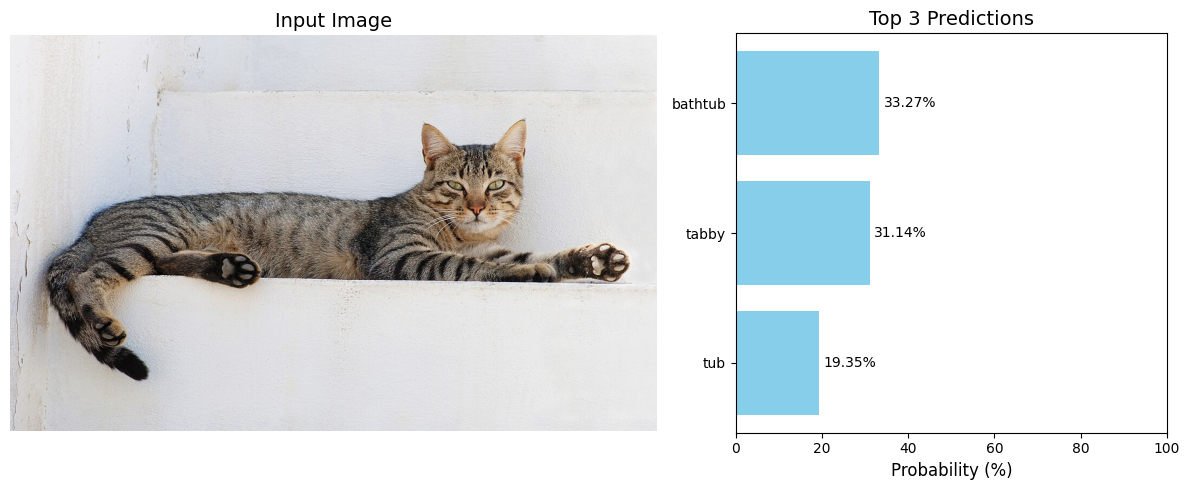


--- Top 3 Predictions (Raw Output) ---
1: bathtub (33.27%)
2: tabby (31.14%)
3: tub (19.35%)


In [3]:
# Make predictions
print("Predicting...")
predictions = model.predict(x)
decoded_preds = decode_predictions(predictions, top=3)[0]

# --- Visualization ---
# Create a figure with two subplots: one for the image, one for the predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 2]})

# --- Subplot 1: Display the original image ---
ax1.imshow(img)
ax1.set_title("Input Image", fontsize=14)
ax1.axis('off')

# --- Subplot 2: Display the top 3 predictions as a bar chart ---
# Extract labels and scores for plotting
labels = [label for _, label, _ in decoded_preds]
scores = [score * 100 for _, _, score in decoded_preds] # Convert to percentage

# Create horizontal bar chart
y_pos = np.arange(len(labels))
ax2.barh(y_pos, scores, align='center', color='skyblue')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(labels)
ax2.invert_yaxis()  # Invert y-axis to show the highest probability at the top
ax2.set_xlabel('Probability (%)', fontsize=12)
ax2.set_title('Top 3 Predictions', fontsize=14)
ax2.set_xlim(0, 100) # Set x-axis limit from 0 to 100

# Add the probability values on the bars for clarity
for index, value in enumerate(scores):
    ax2.text(value + 1, index, f'{value:.2f}%', va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the top 3 predictions in the console as well
print('\n--- Top 3 Predictions (Raw Output) ---')
for i, (imagenet_id, label, score) in enumerate(decoded_preds):
    print(f"{i+1}: {label} ({score:.2%})")